# Assignment 5 - EE18BTECH11050 

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### Ques 1. 

In [77]:
data = np.array([[1, 2.12, 0.04],
     [2, 2.71, 0.11],
     [4, 3.44, 0.12],
     [10, 2.76, 1.20],
     [11, 2.72, 0.12],
     [15, 0.96, 0.30],
     [16, 2.00, 0.60],
     [20, 3.26, 0.60],
     [22, 2.50, 0.30],
     [45, 1.20 ,0.40],
     [87, 1.62 ,0.30],
     [90, 1.30, 0.0],
     [121, 1.96 ,0.34],
     [243, 2.60 ,0.50],
     [253, 1.30 ,0.20],
     [433, 2.67 ,0.03],
     [704, 4.40 ,2.10],
     [762, 1.80 ,0.80],
     [804, 4.90 ,3.90],
     [1999, 2.39, 0.90],
     [2000, 1.62, 1.05],
     [2000, 1.47, 0.95],
     [854, 0.89 ,0.13],
     [1089, 2.52, 0.30],
     [1313, 1.21, 0.25],
     [4492, 0.90, 0.10],
     [617, 0.80, 0.15 ]])    #loading the data from downloaded file

print(data.shape)
density_val = data[:,1]
#tolerance_dens = data[:,2]
#s_num = data[:,0]
print(density_val.shape)

(27, 3)
(27,)


In [78]:
#shapiro-wilk test to density values
statistics, pvalue = stats.shapiro(density_val)
print('shapiro-wilk test to density values: \n', 'W =',statistics, 'p-value =', pvalue)

#shapiro-wilk test to natural log of density values
statistics2, pvalue2 = stats.shapiro(np.log(density_val))
print('shapiro-wilk test to natural log of density values: \n', 'W =',statistics2, 'p-value =', pvalue2)

shapiro-wilk test to density values: 
 W = 0.9246721863746643 p-value = 0.051220282912254333
shapiro-wilk test to natural log of density values: 
 W = 0.9686306715011597 p-value = 0.5660613775253296


Above values indicate that the array of natural log on density values is closer to a gaussian distribution.

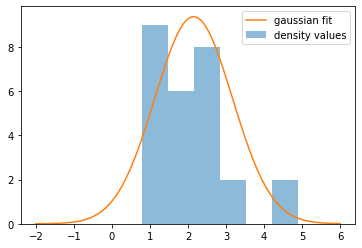

In [89]:
#density values plot with gaussian fit
mu, sigma = stats.norm.fit(density_val)
x = np.linspace(-2,6,1000)
pdf = stats.norm(mu, sigma).pdf(x)

plt.figure()
plt.hist(density_val, bins=6, alpha = 0.5, label='density values')
plt.plot(x, 24*pdf, label='gaussian fit')
plt.legend()
plt.show()

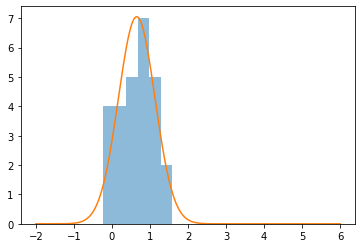

In [100]:
#log of density values with gaussian fit
mu, sigma = stats.norm.fit(np.log(density_val))
x = np.linspace(-2,6,1000)
pdf = stats.norm(mu, sigma).pdf(x)

plt.figure()
plt.hist(np.log(density_val), bins=6, alpha=0.5, label='ln(density values)')
plt.plot(x, 8.5*pdf, label='gaussian fit')
plt.show()

Clearly, the distribution of natural log of density values is closer to a Gaussian Distribution

### Ques 2.

In [101]:
data = np.loadtxt('HIP_star.dat') 
print(data.shape)

(2719, 9)


In [102]:
hyades = []
non_hyades = []
n = len(data)

for i in range(n):
    if(data[i][2] >= 50 and data[i][2] <= 100):
        if(data[i][3] >= 0 and data[i][3] <= 25):
            if(data[i][5] >= 90 and data[i][5] <= 130):
                if(data[i][6] >= -60 and data[i][6] <= -10):
                    hyades += [data[i][8]]
                else:
                    non_hyades += [data[i][8]]
            else:
                non_hyades += [data[i][8]]
        else:
            non_hyades += [data[i][8]]
    else:
        non_hyades += [data[i][8]]
            
print(len(hyades))

93


In [105]:
hyades = np.array(hyades)
non_hyades = np.array(non_hyades)

#print(hyades.shape)
statistics = stats.ttest_ind(hyades, non_hyades)
print('p-value :',statistics.pvalue)

p-value : 0.00011582222192442334


This small value of p-value, assuming null hypothesis : "The Hyades stars have the same color as the non-Hyades stars", indicates that the color of Hyades stars differs from non-Hyades stars